In [1]:
import pandas as pd
import matplotlib 
import numpy as np
import scipy as sp
import datetime
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn')

In [5]:
df = pd.read_csv('NYPD_Motor_Vehicle_Collisions.csv', dtype={"ZIP CODE": object})

In [6]:
df['DATE_TIME'] = pd.to_datetime(df['DATE'] + ' ' + df['TIME']) 
df.set_index('DATE_TIME',inplace=True)

In [7]:
df.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
DATE_TIME,,,,,,,,,,,,,,,,,,,,,
2018-05-19 00:00:00,05/19/2018,0:00,MANHATTAN,10018,40.751080,-73.98686,"(40.75108, -73.98686)",WEST 36 STREET,AVENUE OF THE AMERICAS,NaN,...,Unspecified,NaN,NaN,NaN,3904738,TAXI,TAXI,NaN,NaN,NaN
2018-05-19 00:00:00,05/19/2018,0:00,QUEENS,11418,40.701110,-73.82007,"(40.70111, -73.82007)",88 AVENUE,132 STREET,NaN,...,Unspecified,NaN,NaN,NaN,3905019,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
2018-05-19 00:00:00,05/19/2018,0:00,QUEENS,11429,40.702602,-73.74910,"(40.702602, -73.7491)",NaN,NaN,113-19 FRANCIS LEWIS BOULEVARD,...,Unspecified,NaN,NaN,NaN,3904684,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
2018-05-19 00:00:00,05/19/2018,0:00,NaN,NaN,40.653960,-74.00699,"(40.65396, -74.00699)",GOWANUS RAMP,NaN,NaN,...,Unspecified,NaN,NaN,NaN,3903730,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
2018-05-19 00:01:00,05/19/2018,0:01,NaN,NaN,40.844970,-73.90920,"(40.84497, -73.9092)",CROSS BRONX EXPY,NaN,NaN,...,Driver Inattention/Distraction,NaN,NaN,NaN,3904591,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN


In [8]:
df['hour'] = df.index.hour 
df = df[df['BOROUGH']=='QUEENS']

In [9]:
pivoted = df.pivot_table('UNIQUE KEY', index=df.index.hour, columns=df.index.date, aggfunc='count')

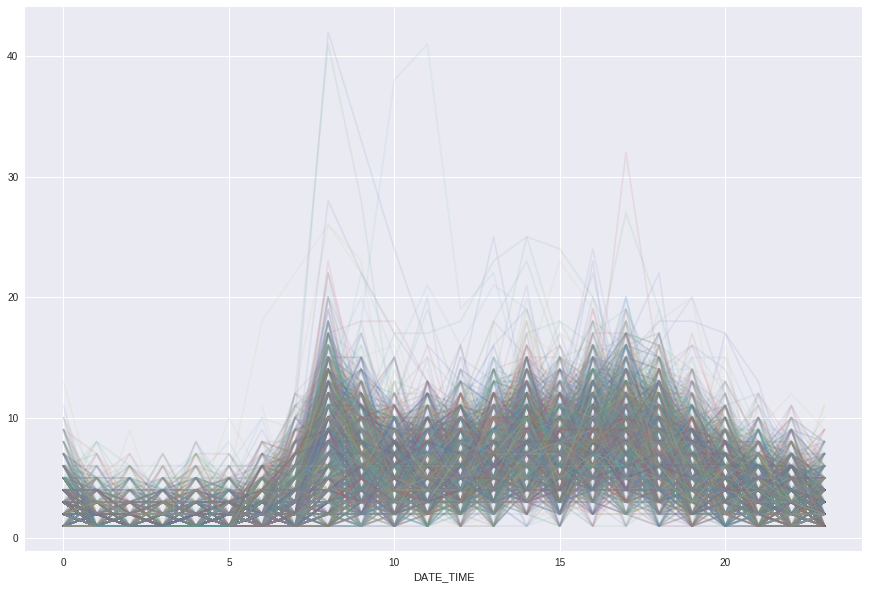

In [10]:
pivoted.plot(legend=False, figsize=(15,10), alpha=0.1)

In [11]:
weekend = np.where(df.index.weekday < 5, 'Weekday', 'Weekend')
by_time = df['UNIQUE KEY'].groupby([weekend, df.index.time]).count()

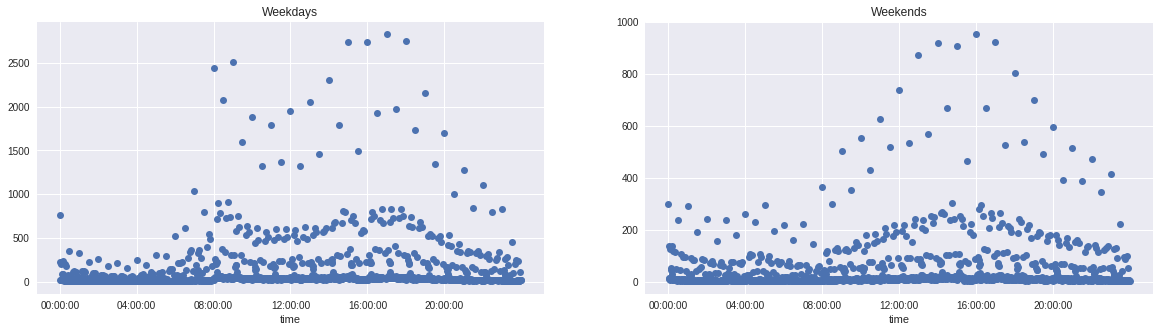

In [12]:
hourly_ticks = 4 * 60 * 60 * np.arange(6)
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.loc['Weekday'].plot(figsize=(20, 5), ax=ax[0], title='Weekdays',
                           xticks=hourly_ticks, style=['o', '--', '-'])
by_time.loc['Weekend'].plot(figsize=(20, 5), ax=ax[1], title='Weekends',
                           xticks=hourly_ticks, style=['o', '--', '-']);

In [13]:
X = pivoted.fillna(0).T.values
X.shape

(2149, 24)

In [14]:
X2 = PCA(2, svd_solver='full').fit_transform(X)
X2.shape

(2149, 2)

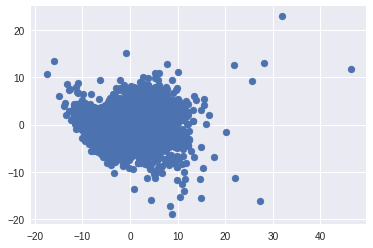

In [15]:
plt.scatter(X2[:, 0], X2[:, 1]);

In [16]:
gmm = GaussianMixture(2).fit(X)
labels = gmm.predict(X)

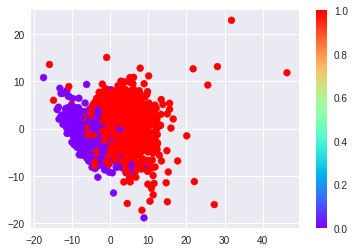

In [17]:
plt.scatter(X2[:, 0], X2[:, 1], c=labels, cmap='rainbow')
plt.colorbar();

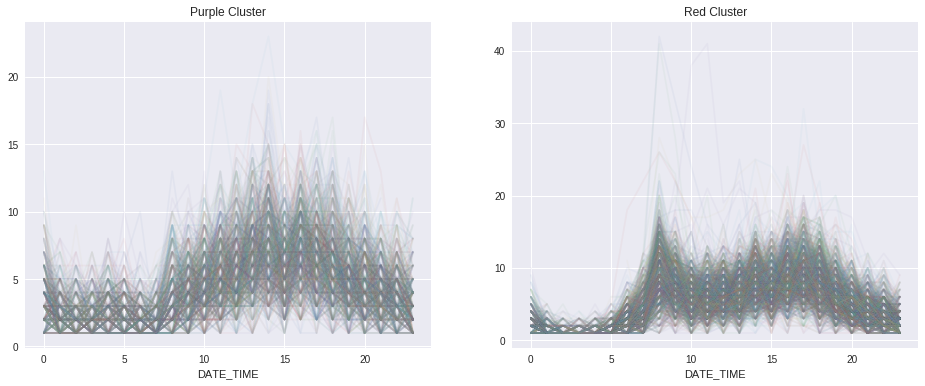

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

pivoted.T[labels == 0].T.plot(legend=False, alpha=0.05, ax=ax[0]);
pivoted.T[labels == 1].T.plot(legend=False, alpha=0.05, ax=ax[1]);

ax[0].set_title('Purple Cluster')
ax[1].set_title('Red Cluster');

In [19]:
dayofweek = pd.DatetimeIndex(pivoted.columns).dayofweek

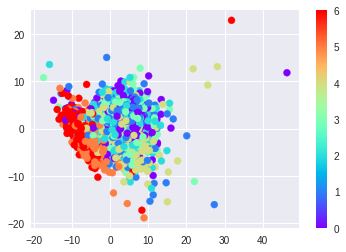

In [20]:
plt.scatter(X2[:, 0], X2[:, 1], c=dayofweek, cmap='rainbow') 
plt.colorbar();

In [24]:
df_11375 = df[(df['ZIP CODE']=='11375') & (df.index.dayofweek > 5)]

In [25]:
#df_11375.groupby(['ON STREET NAME']).count()
p11375 = df_11375.pivot_table('UNIQUE KEY',index='ON STREET NAME', columns=df_11375.index.hour, aggfunc='count')

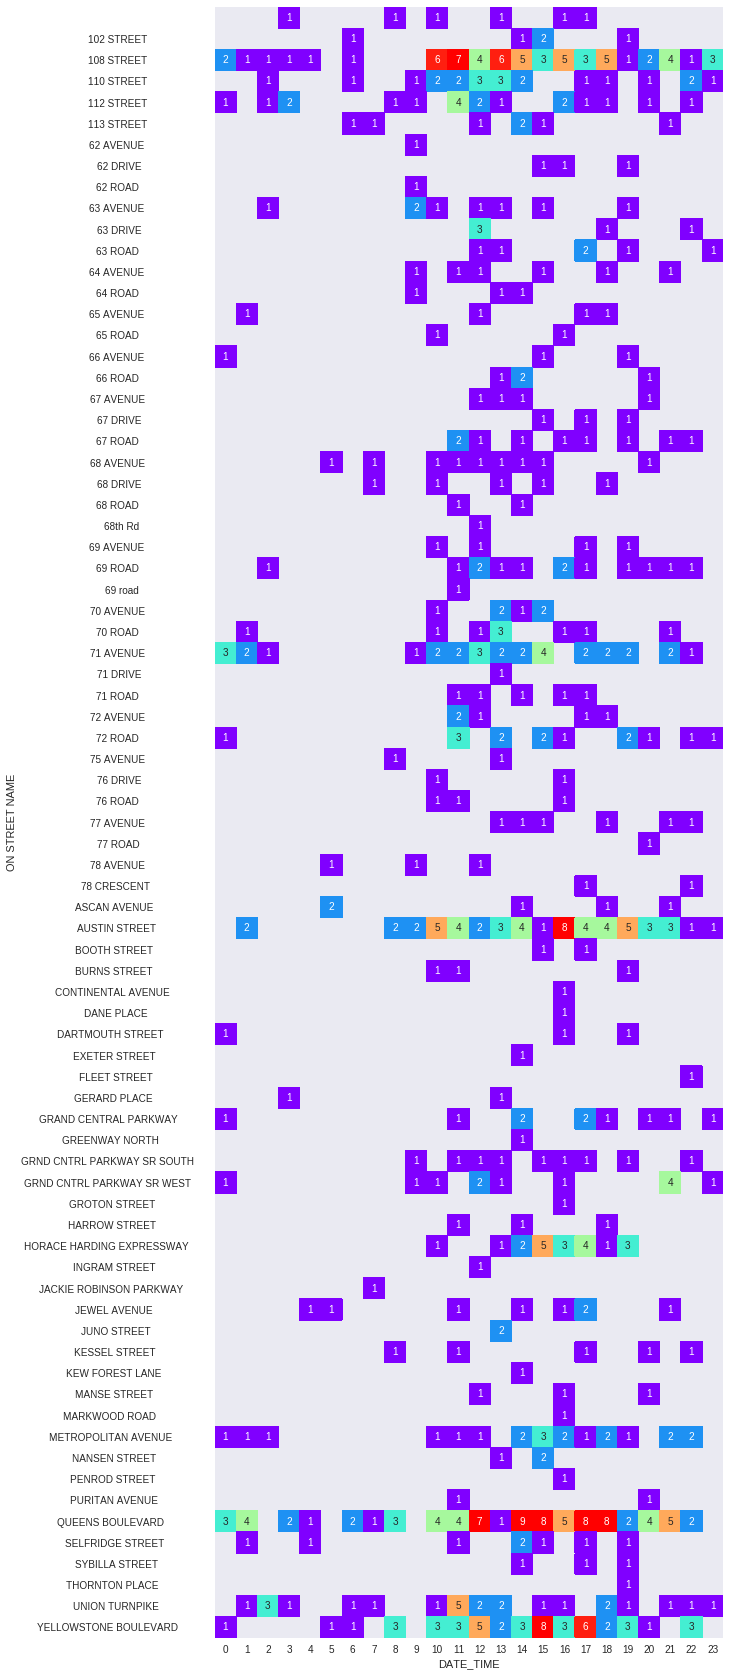

In [26]:
f, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(p11375, square=True, cmap='rainbow', robust=True, annot=True, cbar=False);

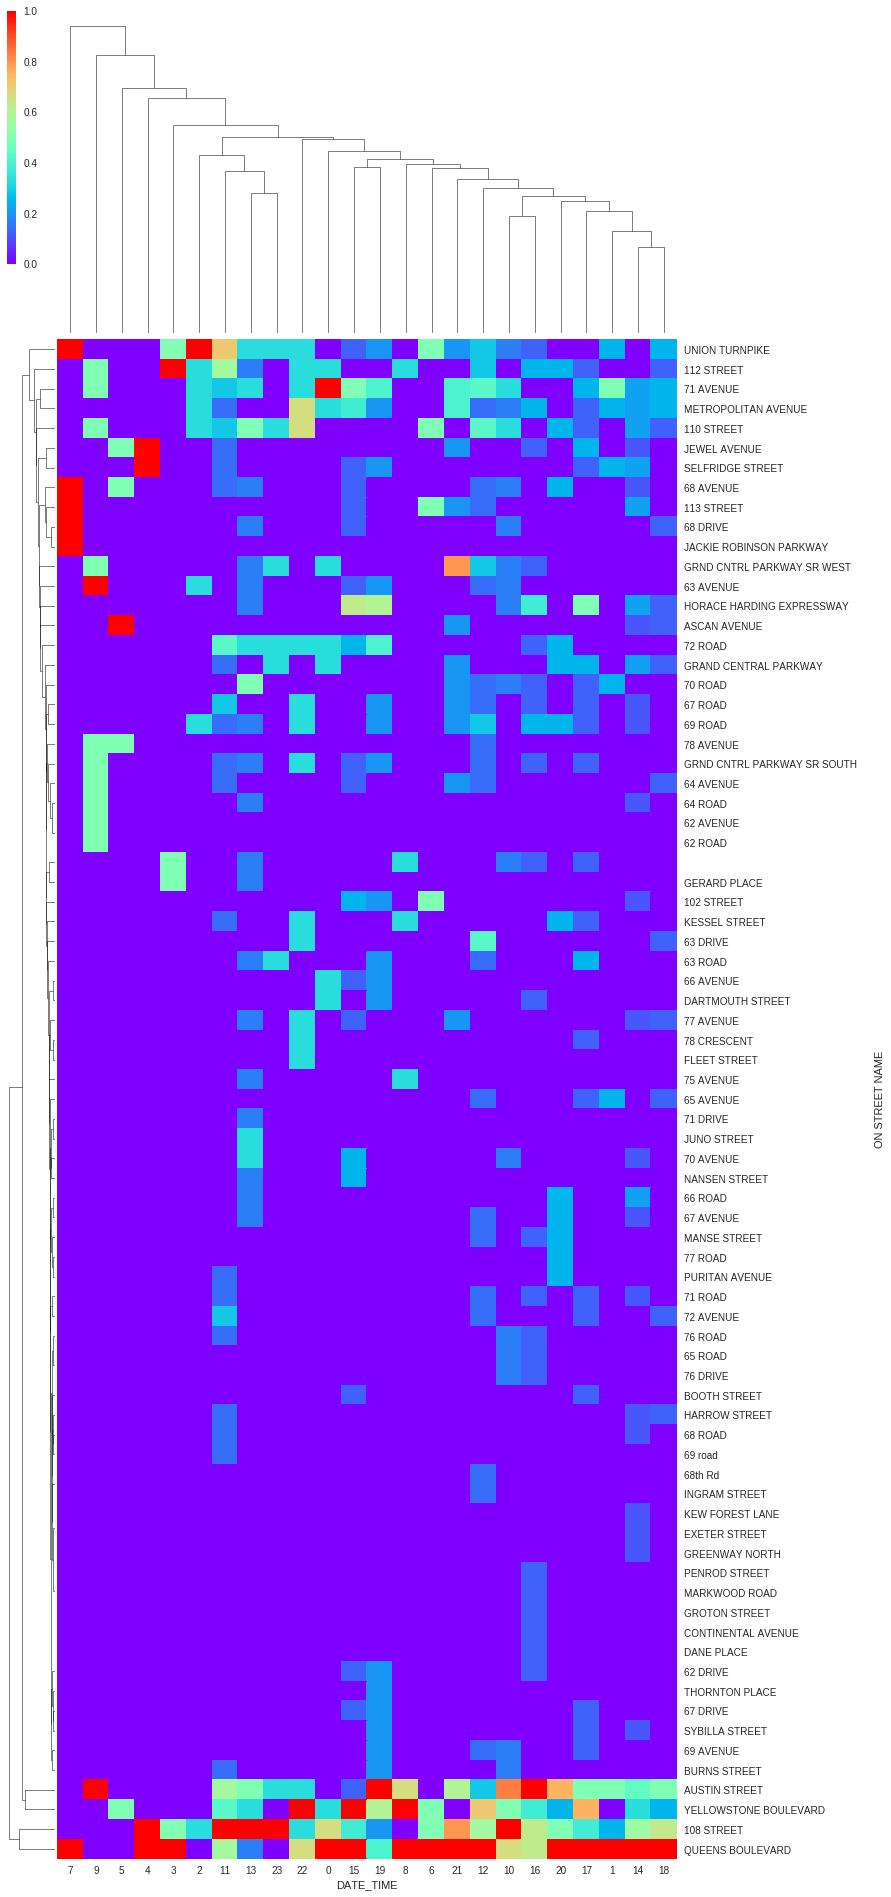

In [27]:
sns.clustermap(p11375.fillna(0), cmap='rainbow', standard_scale=1, figsize=(12,34))

In [28]:
df_11355 = df[(df['ZIP CODE']=='11355') & (df.index.dayofweek > 5)]

In [29]:
p11355 = df_11355.pivot_table('UNIQUE KEY',index='ON STREET NAME', columns=df_11355.index.hour, aggfunc='count')

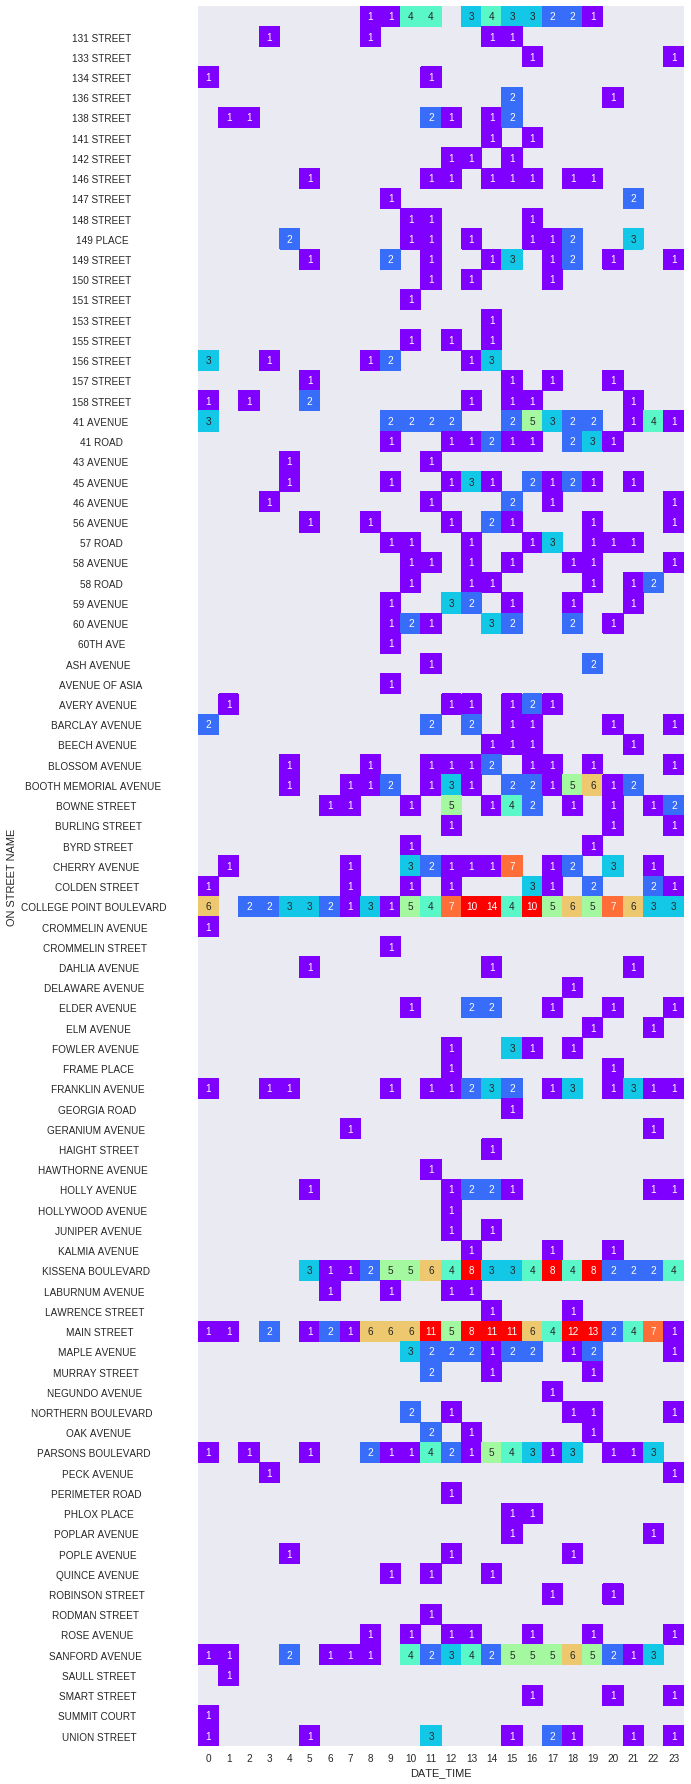

In [30]:
f, ax = plt.subplots(figsize=(32, 32))
sns.heatmap(p11355, square=True, cmap='rainbow', robust=True, annot=True, cbar=False);

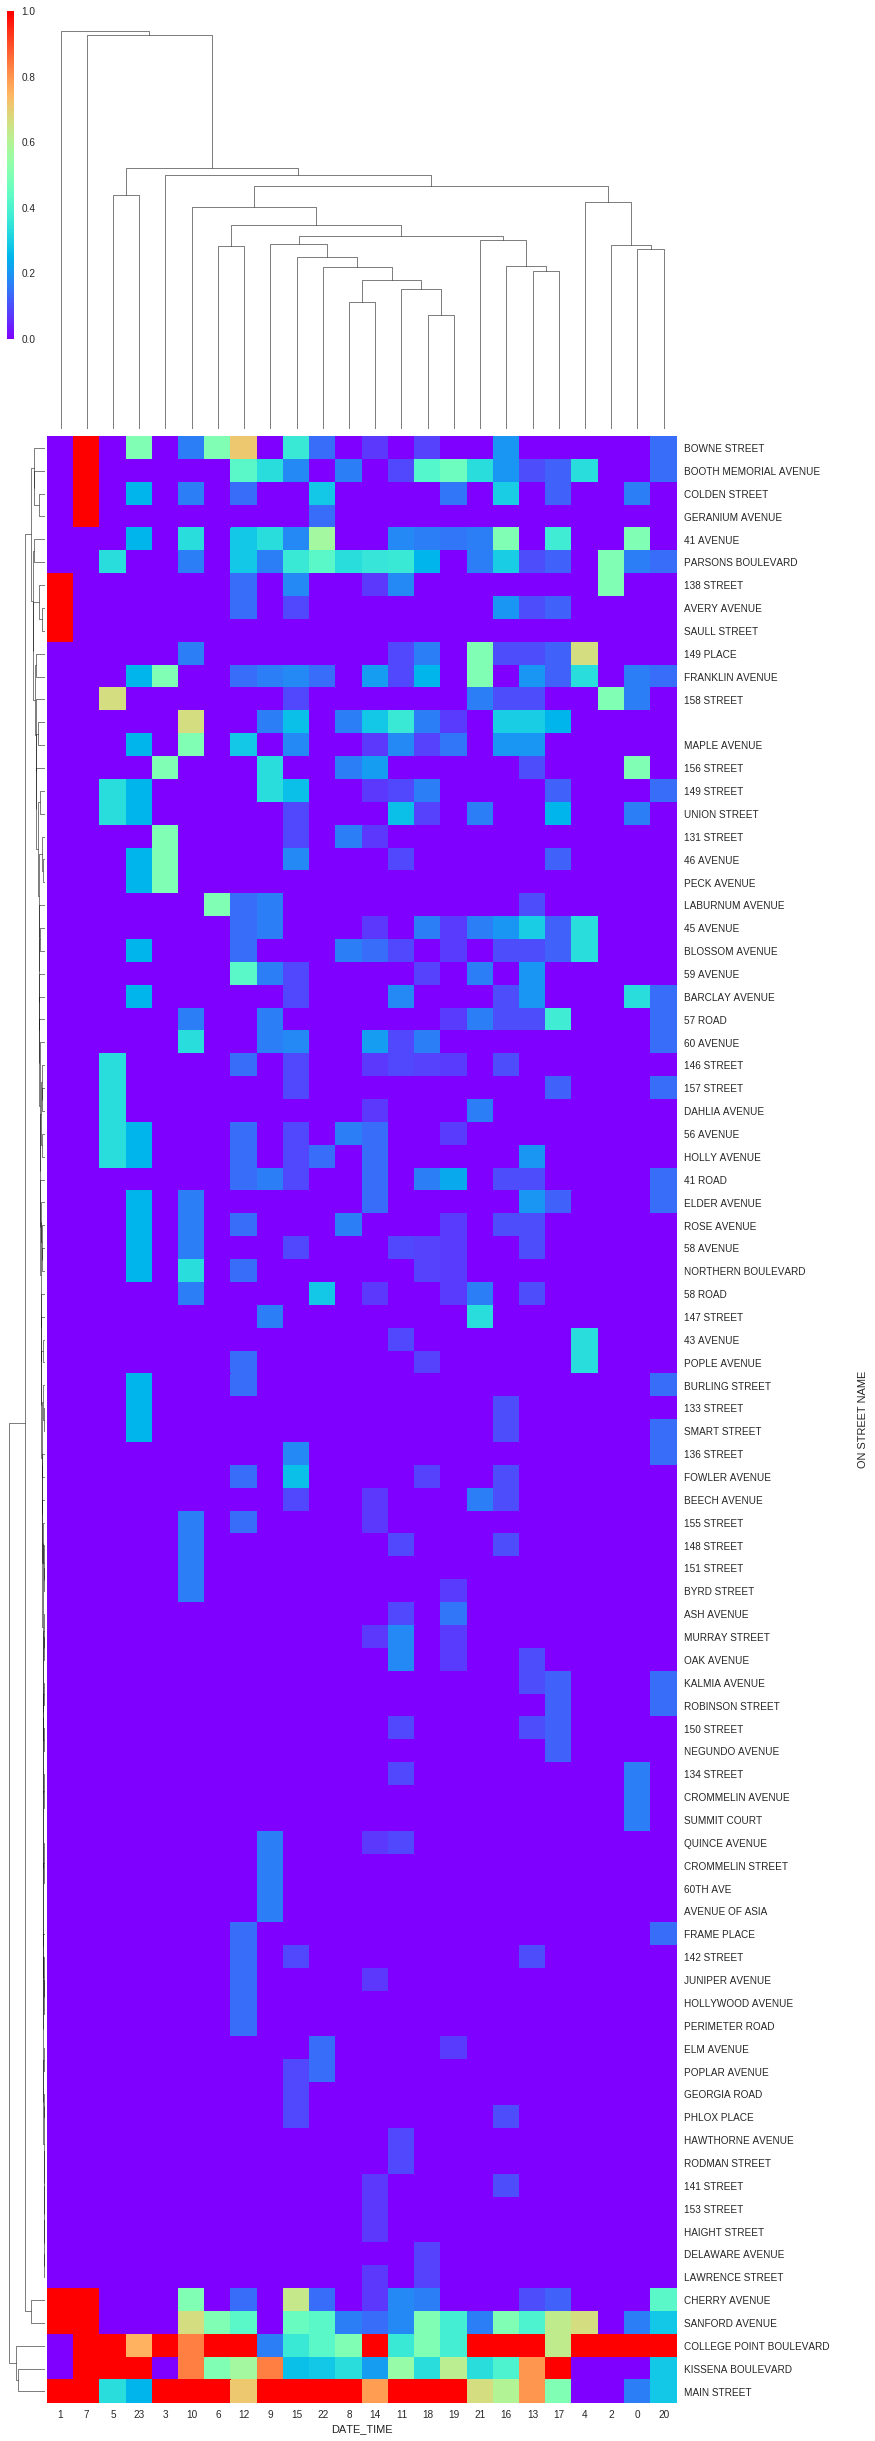

In [31]:
sns.clustermap(p11355.fillna(0), cmap='rainbow', standard_scale=1, figsize=(12,44))